In [1]:
import pandas as pd

# Load the CSV file to preview the data structure
file_path = 'london_merged.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('london_merged.csv')

# Step 1: Data Cleaning
# Drop duplicates
data = data.drop_duplicates()

# Step 2: Data Transformation
# Convert 'timestamp' to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Replace 'weather_code' and 'season' with descriptive labels
weather_mapping = {
    1.0: "Clear",
    2.0: "Scattered Clouds",
    3.0: "Broken Clouds",
    4.0: "Cloudy",
    7.0: "Rain",
    10.0: "Rain with Thunderstorm",
    26.0: "Snowfall"
}
season_mapping = {
    1.0: "Winter",
    2.0: "Spring",
    3.0: "Summer",
    4.0: "Autumn"
}

data['weather'] = data['weather_code'].map(weather_mapping)
data['season'] = data['season'].map(season_mapping)

# Step 3: Add New Columns
# 1. Daytime segment based on hour
def get_time_segment(hour):
    if 5 <= hour < 10:
        return "Morning"
    elif 10 <= hour < 16:
        return "Day"
    elif 16 <= hour < 20:
        return "Evening"
    else:
        return "Night"

data['time_segment'] = data['timestamp'].dt.hour.apply(get_time_segment)

# 2. Extract textual month and weekday
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
data['month'] = data['timestamp'].dt.month.map(month_mapping)
data['weekday'] = data['timestamp'].dt.day_name()

In [3]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,weather,time_segment,month,weekday
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,Summer,Broken Clouds,Night,January,Sunday
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,Summer,Clear,Night,January,Sunday
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,Summer,Clear,Night,January,Sunday
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,Summer,Clear,Night,January,Sunday
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,Summer,Clear,Night,January,Sunday


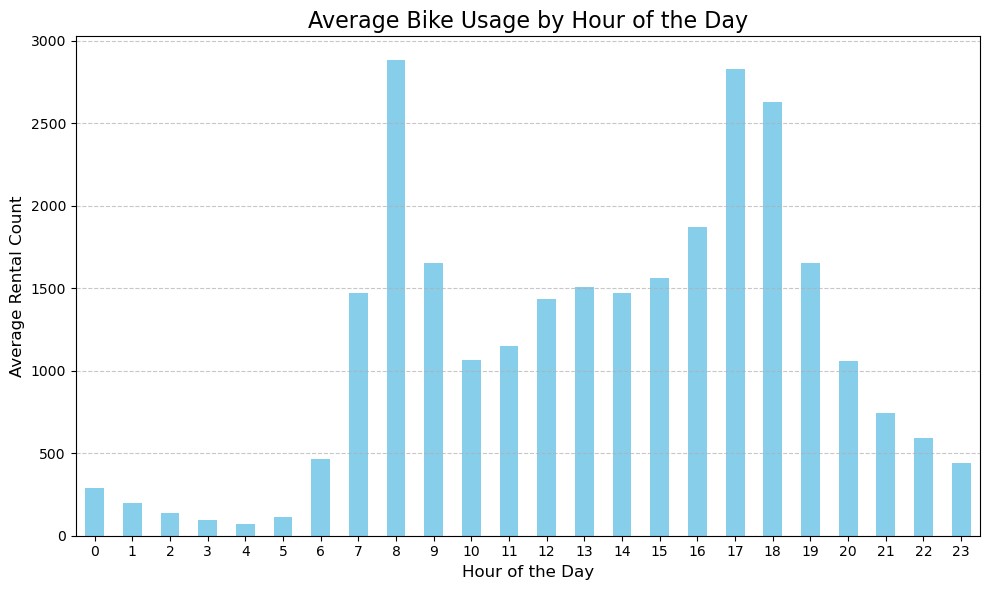

In [4]:
import matplotlib.pyplot as plt
hourly_data = data.groupby(data['timestamp'].dt.hour)['cnt'].mean()

plt.figure(figsize=(10, 6))
hourly_data.plot(kind='bar', color='skyblue')
plt.title('Average Bike Usage by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Rental Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

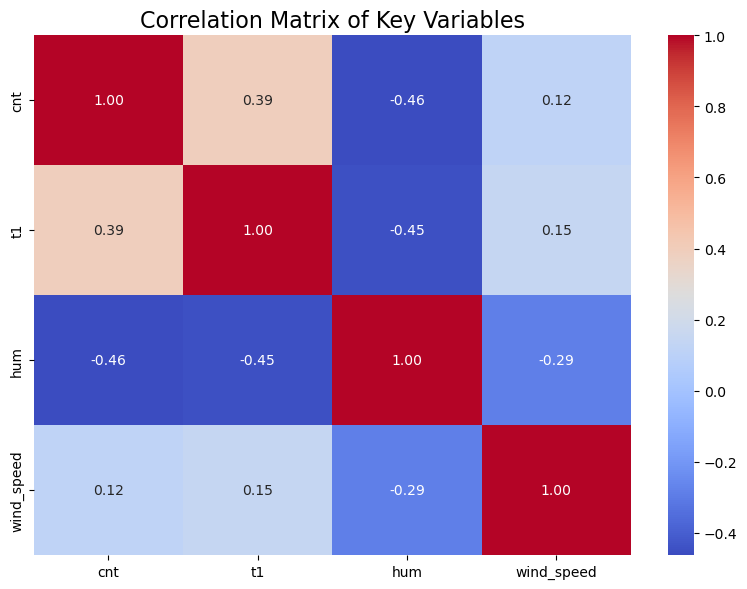

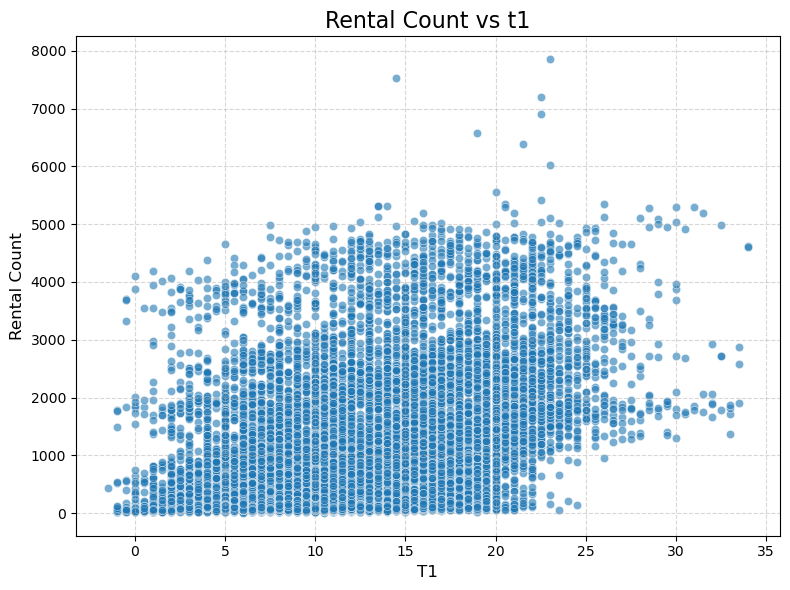

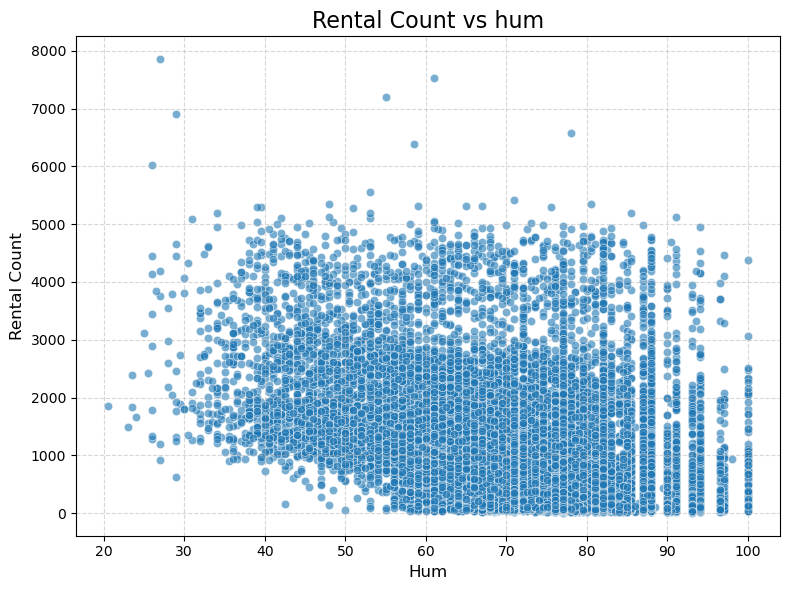

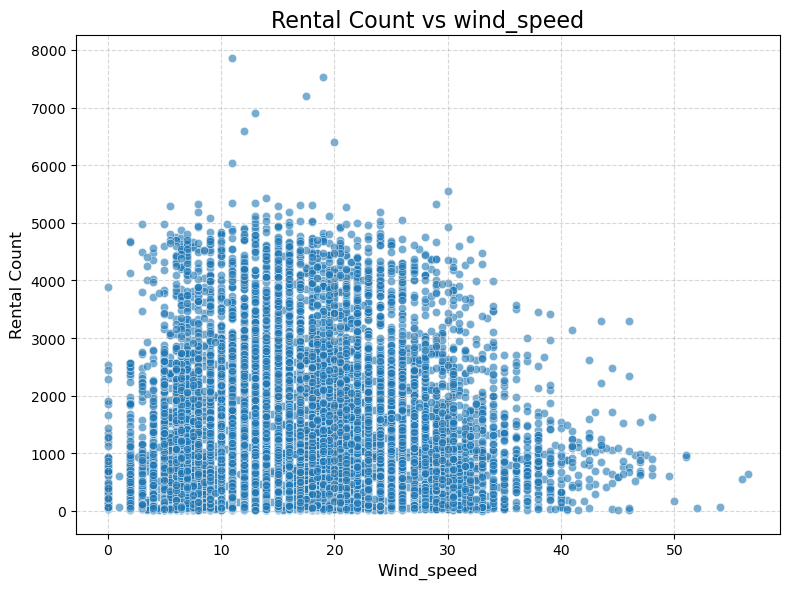

In [5]:
import seaborn as sns
import numpy as np

# Compute the correlation matrix including key variables
columns_of_interest = ['cnt', 't1', 'hum', 'wind_speed']
correlation_matrix = data[columns_of_interest].corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix of Key Variables', fontsize=16)
plt.tight_layout()
plt.show()

# Create scatter plots for each weather variable against rental count
for variable in ['t1', 'hum', 'wind_speed']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[variable], y=data['cnt'], alpha=0.6)
    plt.title(f'Rental Count vs {variable}', fontsize=16)
    plt.xlabel(variable.capitalize(), fontsize=12)
    plt.ylabel('Rental Count', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [6]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

C:\Users\86152\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\86152\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\86152\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\86152\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\86152\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

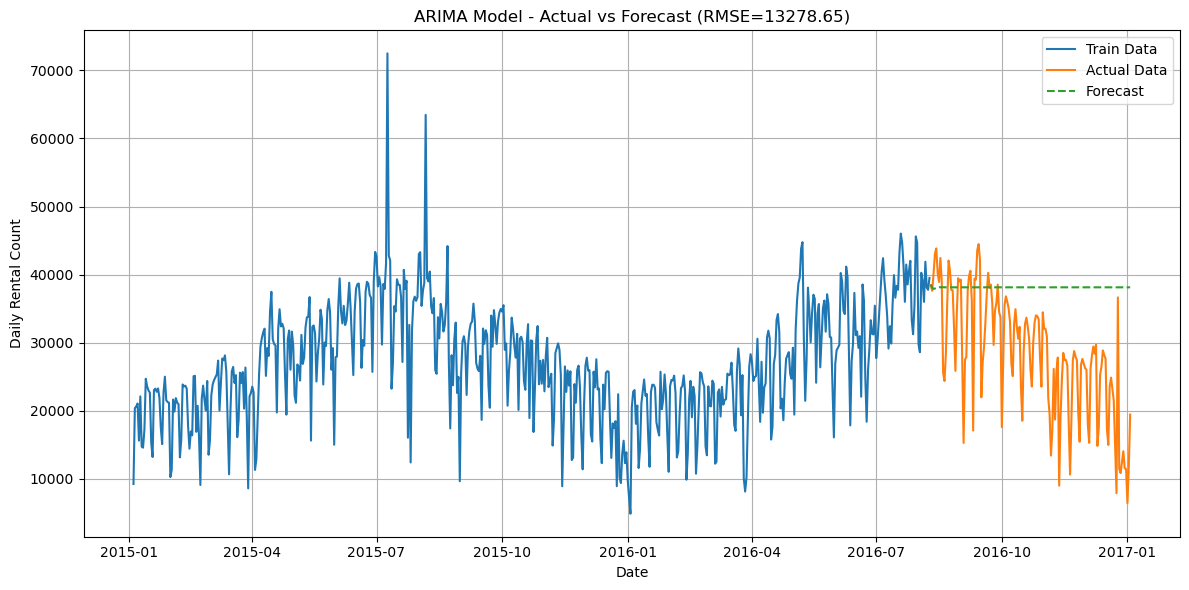

In [11]:
daily_data = data.groupby(data['timestamp'].dt.date)['cnt'].sum()
daily_data.index = pd.to_datetime(daily_data.index)


train_size = int(len(daily_data) * 0.8)
train, test = daily_data[:train_size], daily_data[train_size:]

# ARIMA 
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()

# predicted
forecast = model_fit.forecast(steps=len(test))
rmse_arima = np.sqrt(mean_squared_error(test, forecast))

plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data')
plt.plot(test, label='Actual Data')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title(f'ARIMA Model - Actual vs Forecast (RMSE={rmse_arima:.2f})')
plt.xlabel('Date')
plt.ylabel('Daily Rental Count')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
